# Lab 1 Report: 
## Data Preparation Techniques for Machine Learning and Regression

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image # For displaying images in colab jupyter cell

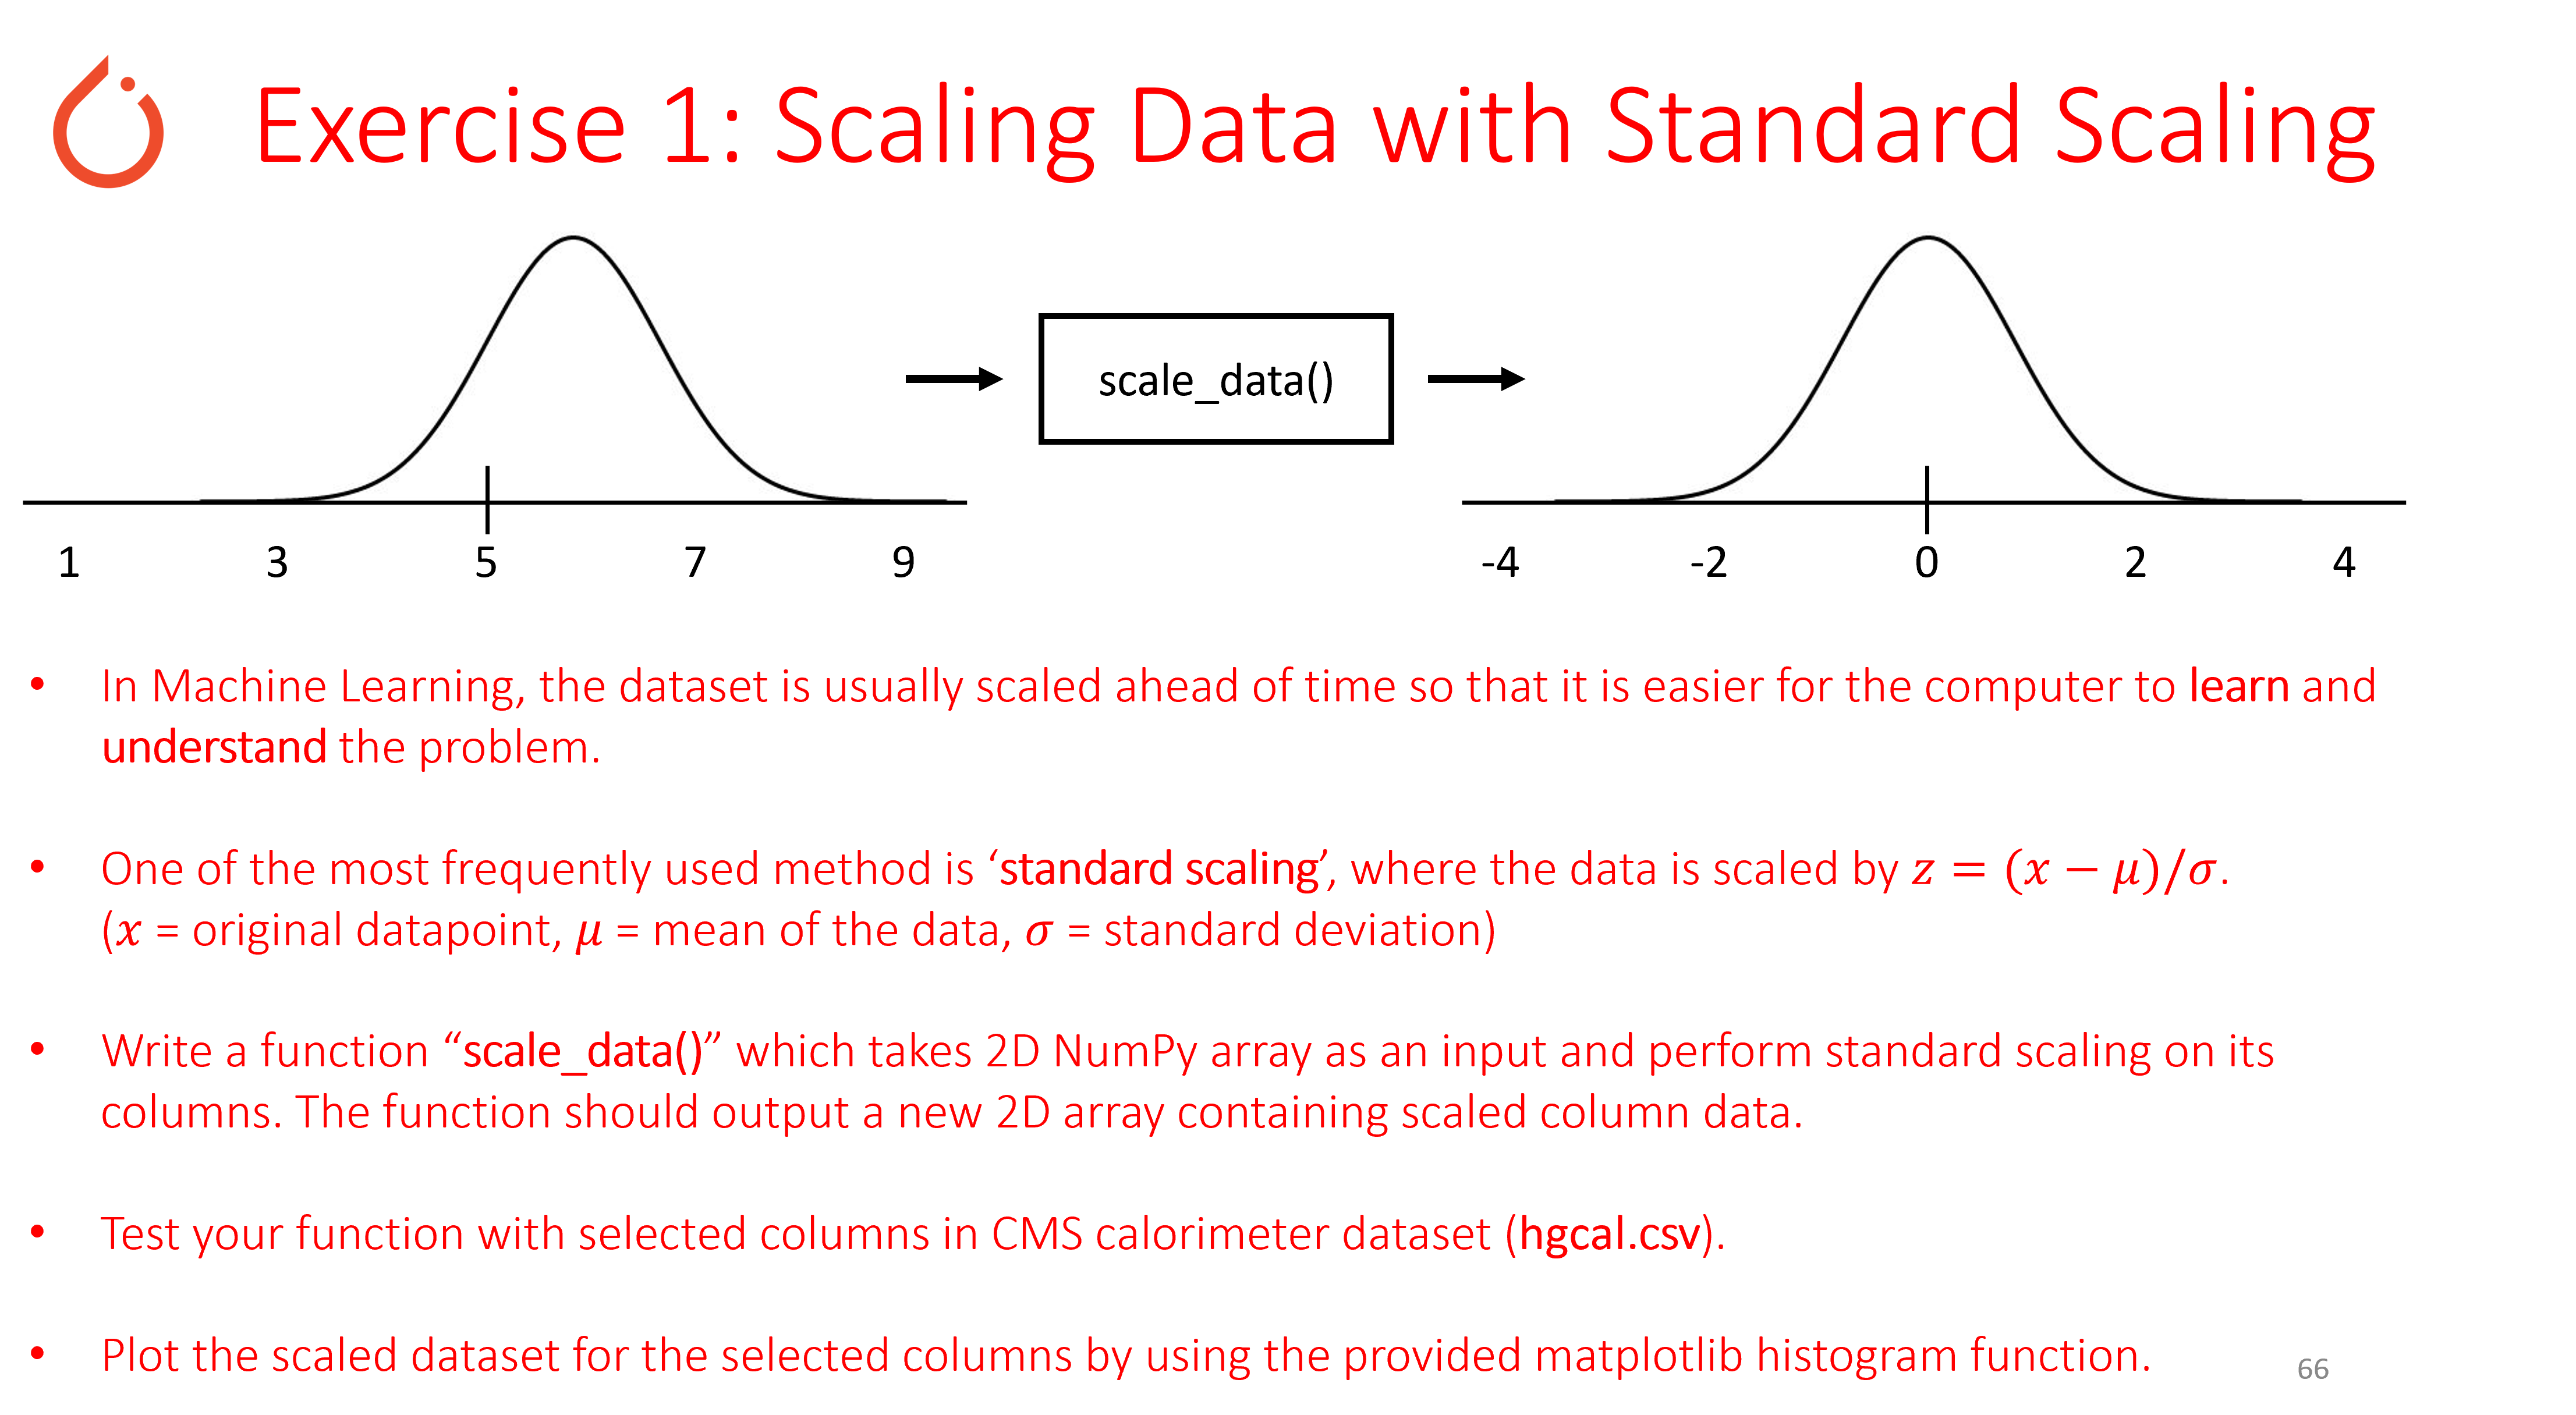

In [3]:
Image('lab1_exercise1.PNG', width = 1000)

In [4]:
# Load the dataset (.csv) using pandas package

CMS_calori_dataset = pd.read_csv('hgcal.csv')

# .head directive on the panda dataframe displays the first n-rows

CMS_calori_dataset.head(n = 10)

,Unnamed: 0,x,y,z,eta,phi,energy,trackId
0,0,179.50383,-23.632137,-7.878280,-0.0435,-0.130900,0.200126,462412
1,1,-143.63881,110.217940,-72.706795,-0.3915,2.487094,2.734594,493395
2,2,179.50383,-23.632120,-146.429610,-0.7395,-0.130900,0.423910,1
3,3,-172.67310,54.443620,-238.065340,-1.0875,2.836160,0.713950,493640
4,4,-180.88046,7.897389,-238.065340,-1.0875,3.097959,0.000000,495225
5,5,-180.88045,-7.897438,-238.065340,-1.0875,-3.097959,0.034491,495225
6,6,-152.69838,-97.279590,-265.020540,-1.1745,-2.574361,0.580138,460126
7,7,-23.63213,179.503810,-325.172060,-1.3485,1.701696,0.411487,465028
8,8,-152.69835,97.279594,89.977780,0.4785,2.574361,0.183141,1383
9,9,-176.76110,39.187016,107.930240,0.5655,2.923426,0.337551,4421


In [5]:
# Convert the panda dataframe into numpy 2D array

CMS_calori_dataset_np = CMS_calori_dataset.to_numpy()

# The converted numpy array has the dimension of 420 (rows) x 8 (columns)

print(CMS_calori_dataset_np.shape)

(420, 8)


In [6]:
# Extract only x, y, z, eta, phi and energy columns from the dataset and stack them along column direction
# Name this new 2D array CMS_calori_dataset_np_sub.
# The array should have dimension 420 (rows) x 6 (columns)

# YOUR CODE HERE

# 0 index is blank for column label, 7 is trackID
CMS_calori_dataset_np_sub = CMS_calori_dataset_np[:, 1:7] 

#x = CMS_calori_dataset_np_sub[:,3]

print(CMS_calori_dataset_np_sub.shape)
#print(x)


(420, 6)


In [7]:
# Create the scaling function

def scale_data(arr):
    
    # YOUR CODE HERE
    # z = (x - (mean))/(std div)
    
    scaled_data = np.zeros_like(arr)
    
    for i in range(arr.shape[1]):
        mean = np.mean(arr[:, i])
        std_div = np.std(arr[:, i])
        scaled_data[:, i] = (arr[:, i] - mean) / std_div
    
    return scaled_data

In [8]:
# Test the function with CMS_calori_dataset_np_sub

CMS_calori_dataset_np_sub_scaled = scale_data(CMS_calori_dataset_np_sub)

print(CMS_calori_dataset_np_sub_scaled)

[[ 1.91214438 -0.51027049 -0.44193343 -0.47341363 -0.31488841 -0.38410307]
 [-1.64893594  1.11270897 -0.61977219 -0.64676625  1.28785592  0.99873768]
 [ 1.91214438 -0.51027028 -0.82200995 -0.82011889 -0.31488835 -0.26200369]
 ...
 [-0.45937553 -0.84184024  1.01382735  0.95550021 -1.57037143 -0.20325779]
 [-0.24351375 -0.95259315  1.01382735  0.95550021 -1.3566721  -0.41567962]
 [ 0.59642074 -0.41902261  1.01382735  0.95550021 -0.39502545  0.64852692]]


179.50383
1.9121443841126704


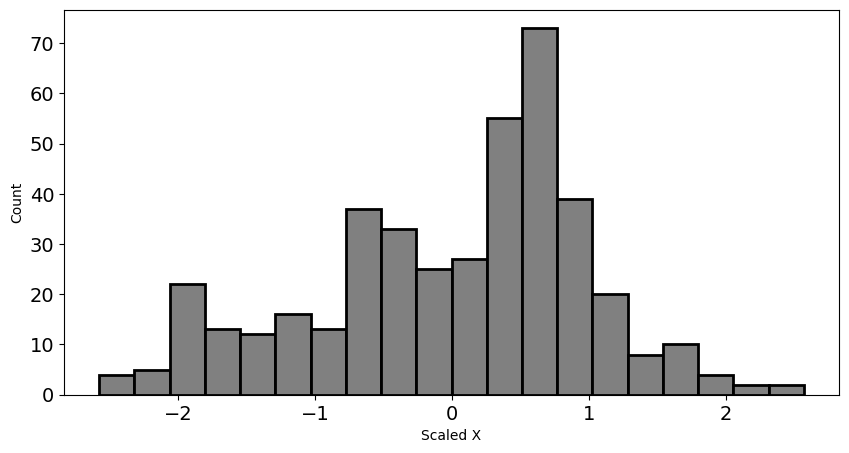

In [9]:
# Confirm the data is scaled for 'x' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 0], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

# YOUR CODE HERE

print(CMS_calori_dataset_np_sub[0, 0])
print(CMS_calori_dataset_np_sub_scaled[0, 0])

plt.xlabel("Scaled X")
plt.ylabel("Count")



plt.show()

0.20012644
-0.3841030665909712


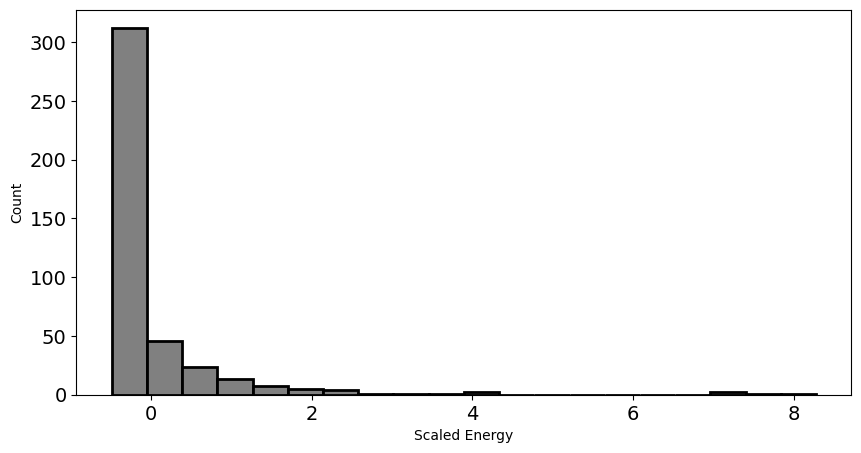

In [10]:
# Confirm the data is scaled for 'energy' column

plt.figure(figsize = (10, 5))

plt.hist(CMS_calori_dataset_np_sub_scaled[:, 5], bins = 20, facecolor = 'grey', edgecolor = 'black', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add proper x-label and y-label 

# YOUR CODE HERE 

print(CMS_calori_dataset_np_sub[0, 5])
print(CMS_calori_dataset_np_sub_scaled[0, 5])

plt.xlabel("Scaled Energy")
plt.ylabel("Count")



plt.show()

### Expected histogram outputs - Feel free to style your plot differently

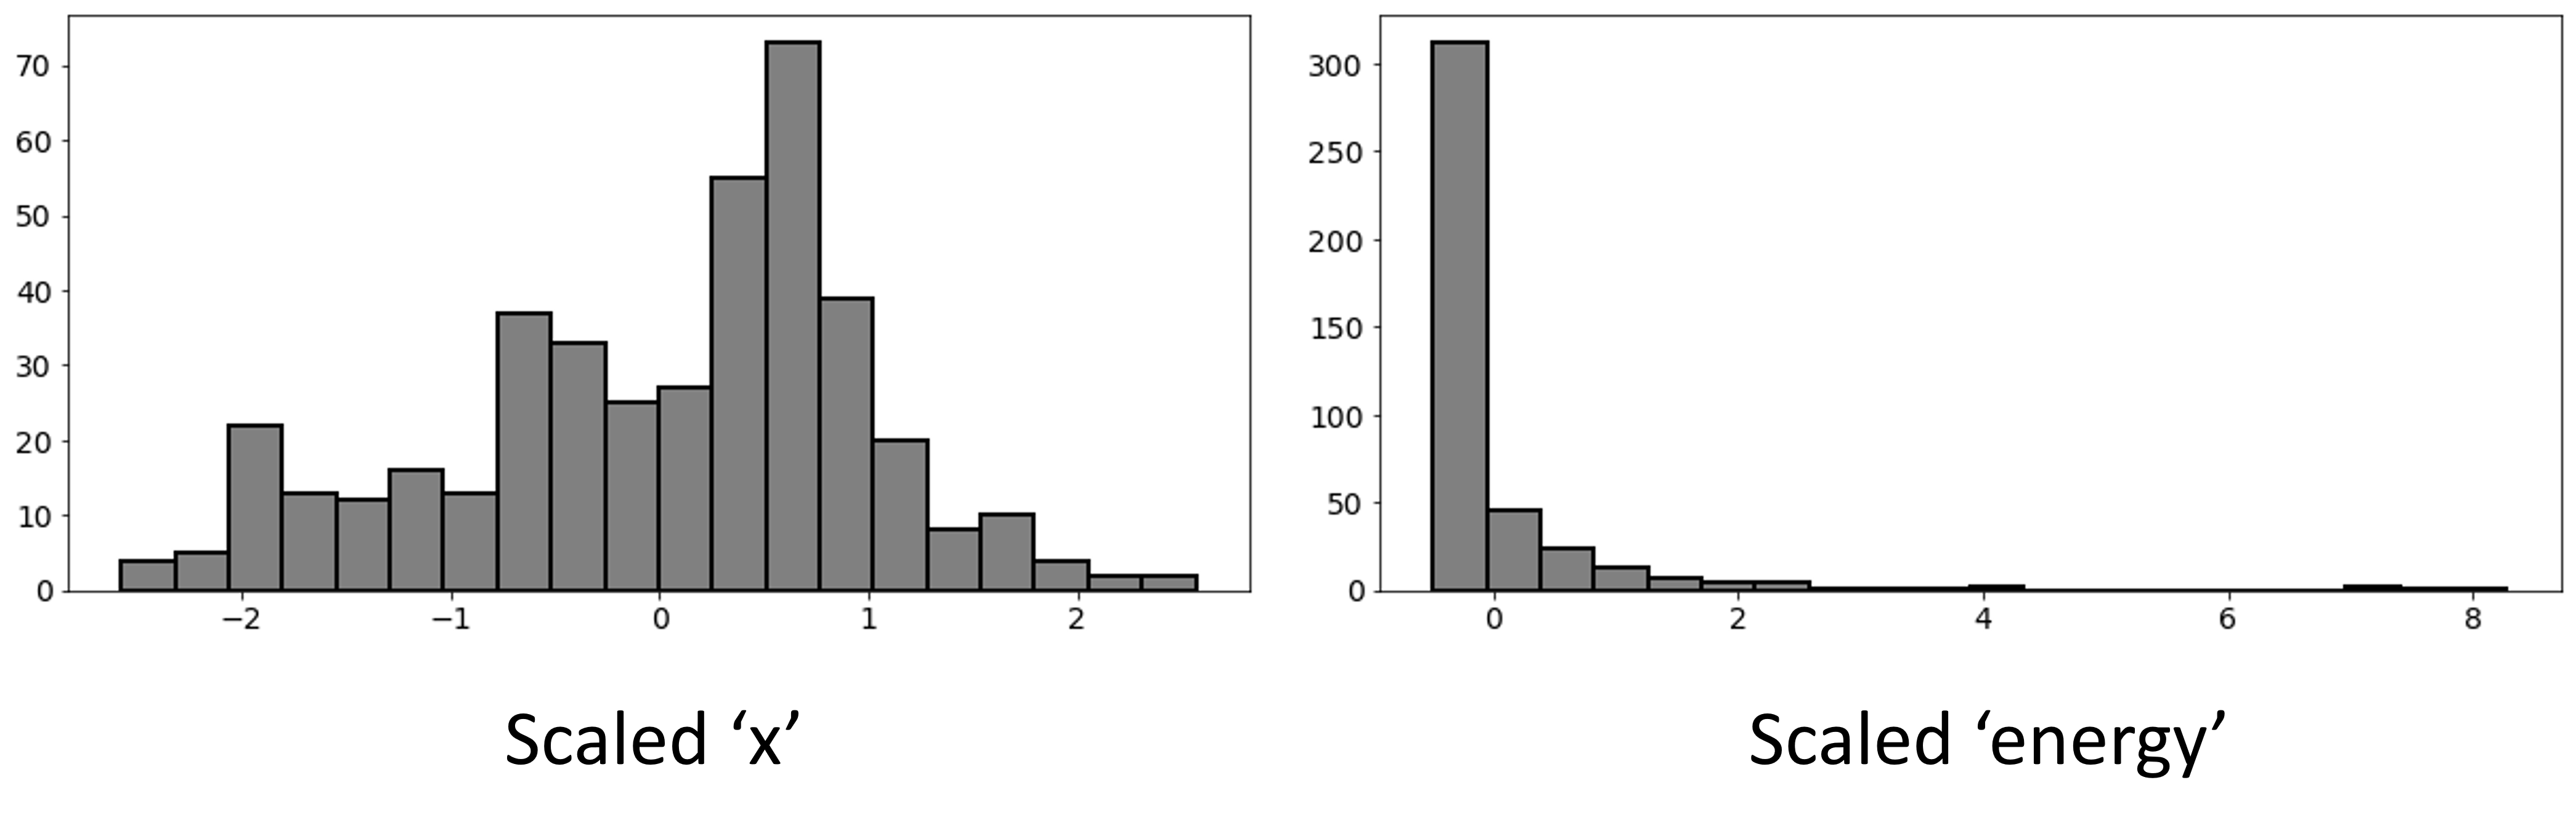

In [11]:
Image('lab1_e1_expected_outputs.PNG', width = 1000)

---

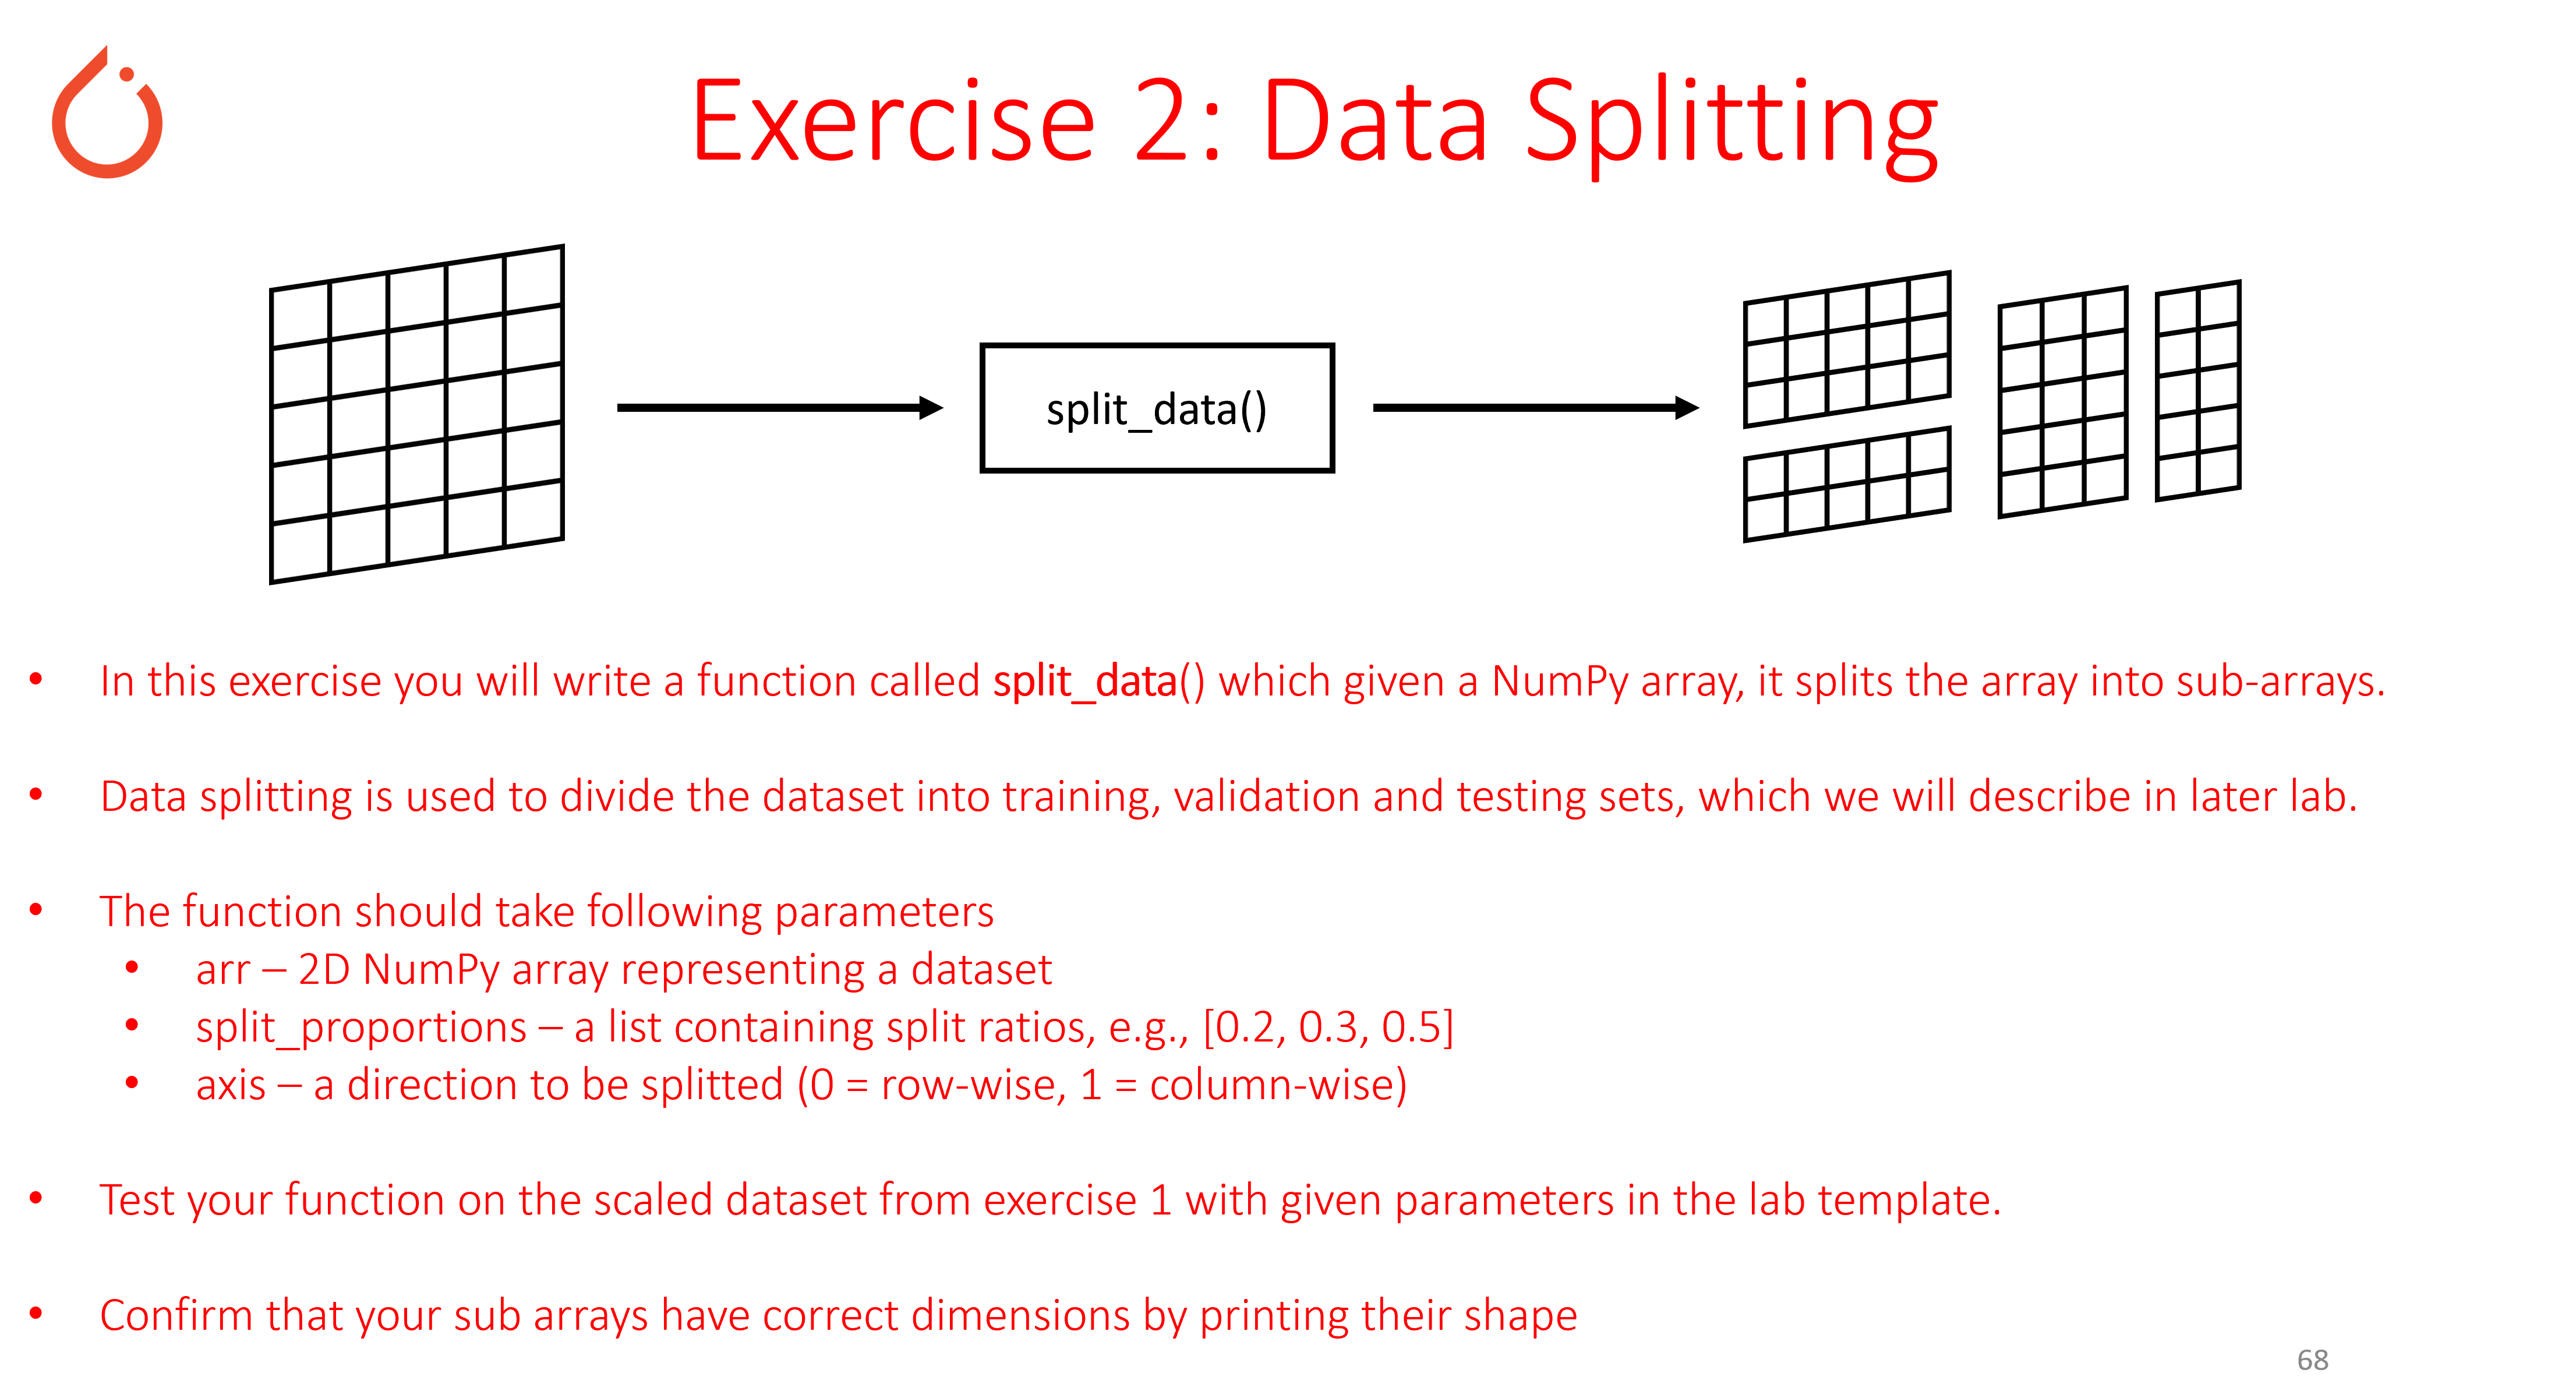

In [12]:
Image('lab1_exercise2.PNG', width = 1000)

In [13]:
# Create the splitting function

def split_data(arr, split_proportions, axis = 0):
    # Check that proportions add up to 1.0
    if np.sum(split_proportions) != 1:
        print("Split proportions must sum to 1")
        return None
   
    # Get total size along the specified axis
    size = arr.shape[axis]
    
    # When multiplied by the size and converted to int, we get the split points
    # cumsum helps because .6, .2, .2 gives us .6, .8, 1.0. Sum just gives us 1
    indices = (size * np.cumsum(split_proportions[:-1])).astype(int)  

    # Split the array at calculated indices
    split_data_list = np.split(arr, indices , axis)

    return split_data_list

In [14]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_1 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                    split_proportions = [0.6, 0.2, 0.2], axis = 0)

In [15]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (252, 6) (84, 6) (84, 6)

print(sub_data_list_1[0].shape, sub_data_list_1[1].shape, sub_data_list_1[2].shape)

(252, 6) (84, 6) (84, 6)


In [16]:
# Test your split function against scaled CMS Calorimieter dataset from exercise 1

sub_data_list_2 = split_data(arr = CMS_calori_dataset_np_sub_scaled, 
                                                split_proportions = [0.5, 0.5], axis = 1)

In [17]:
# Confirm that dataset has been split into correct shapes
# The correct dimensions should be (420, 3) (420, 3)

print(sub_data_list_2[0].shape, sub_data_list_2[1].shape)

(420, 3) (420, 3)


---

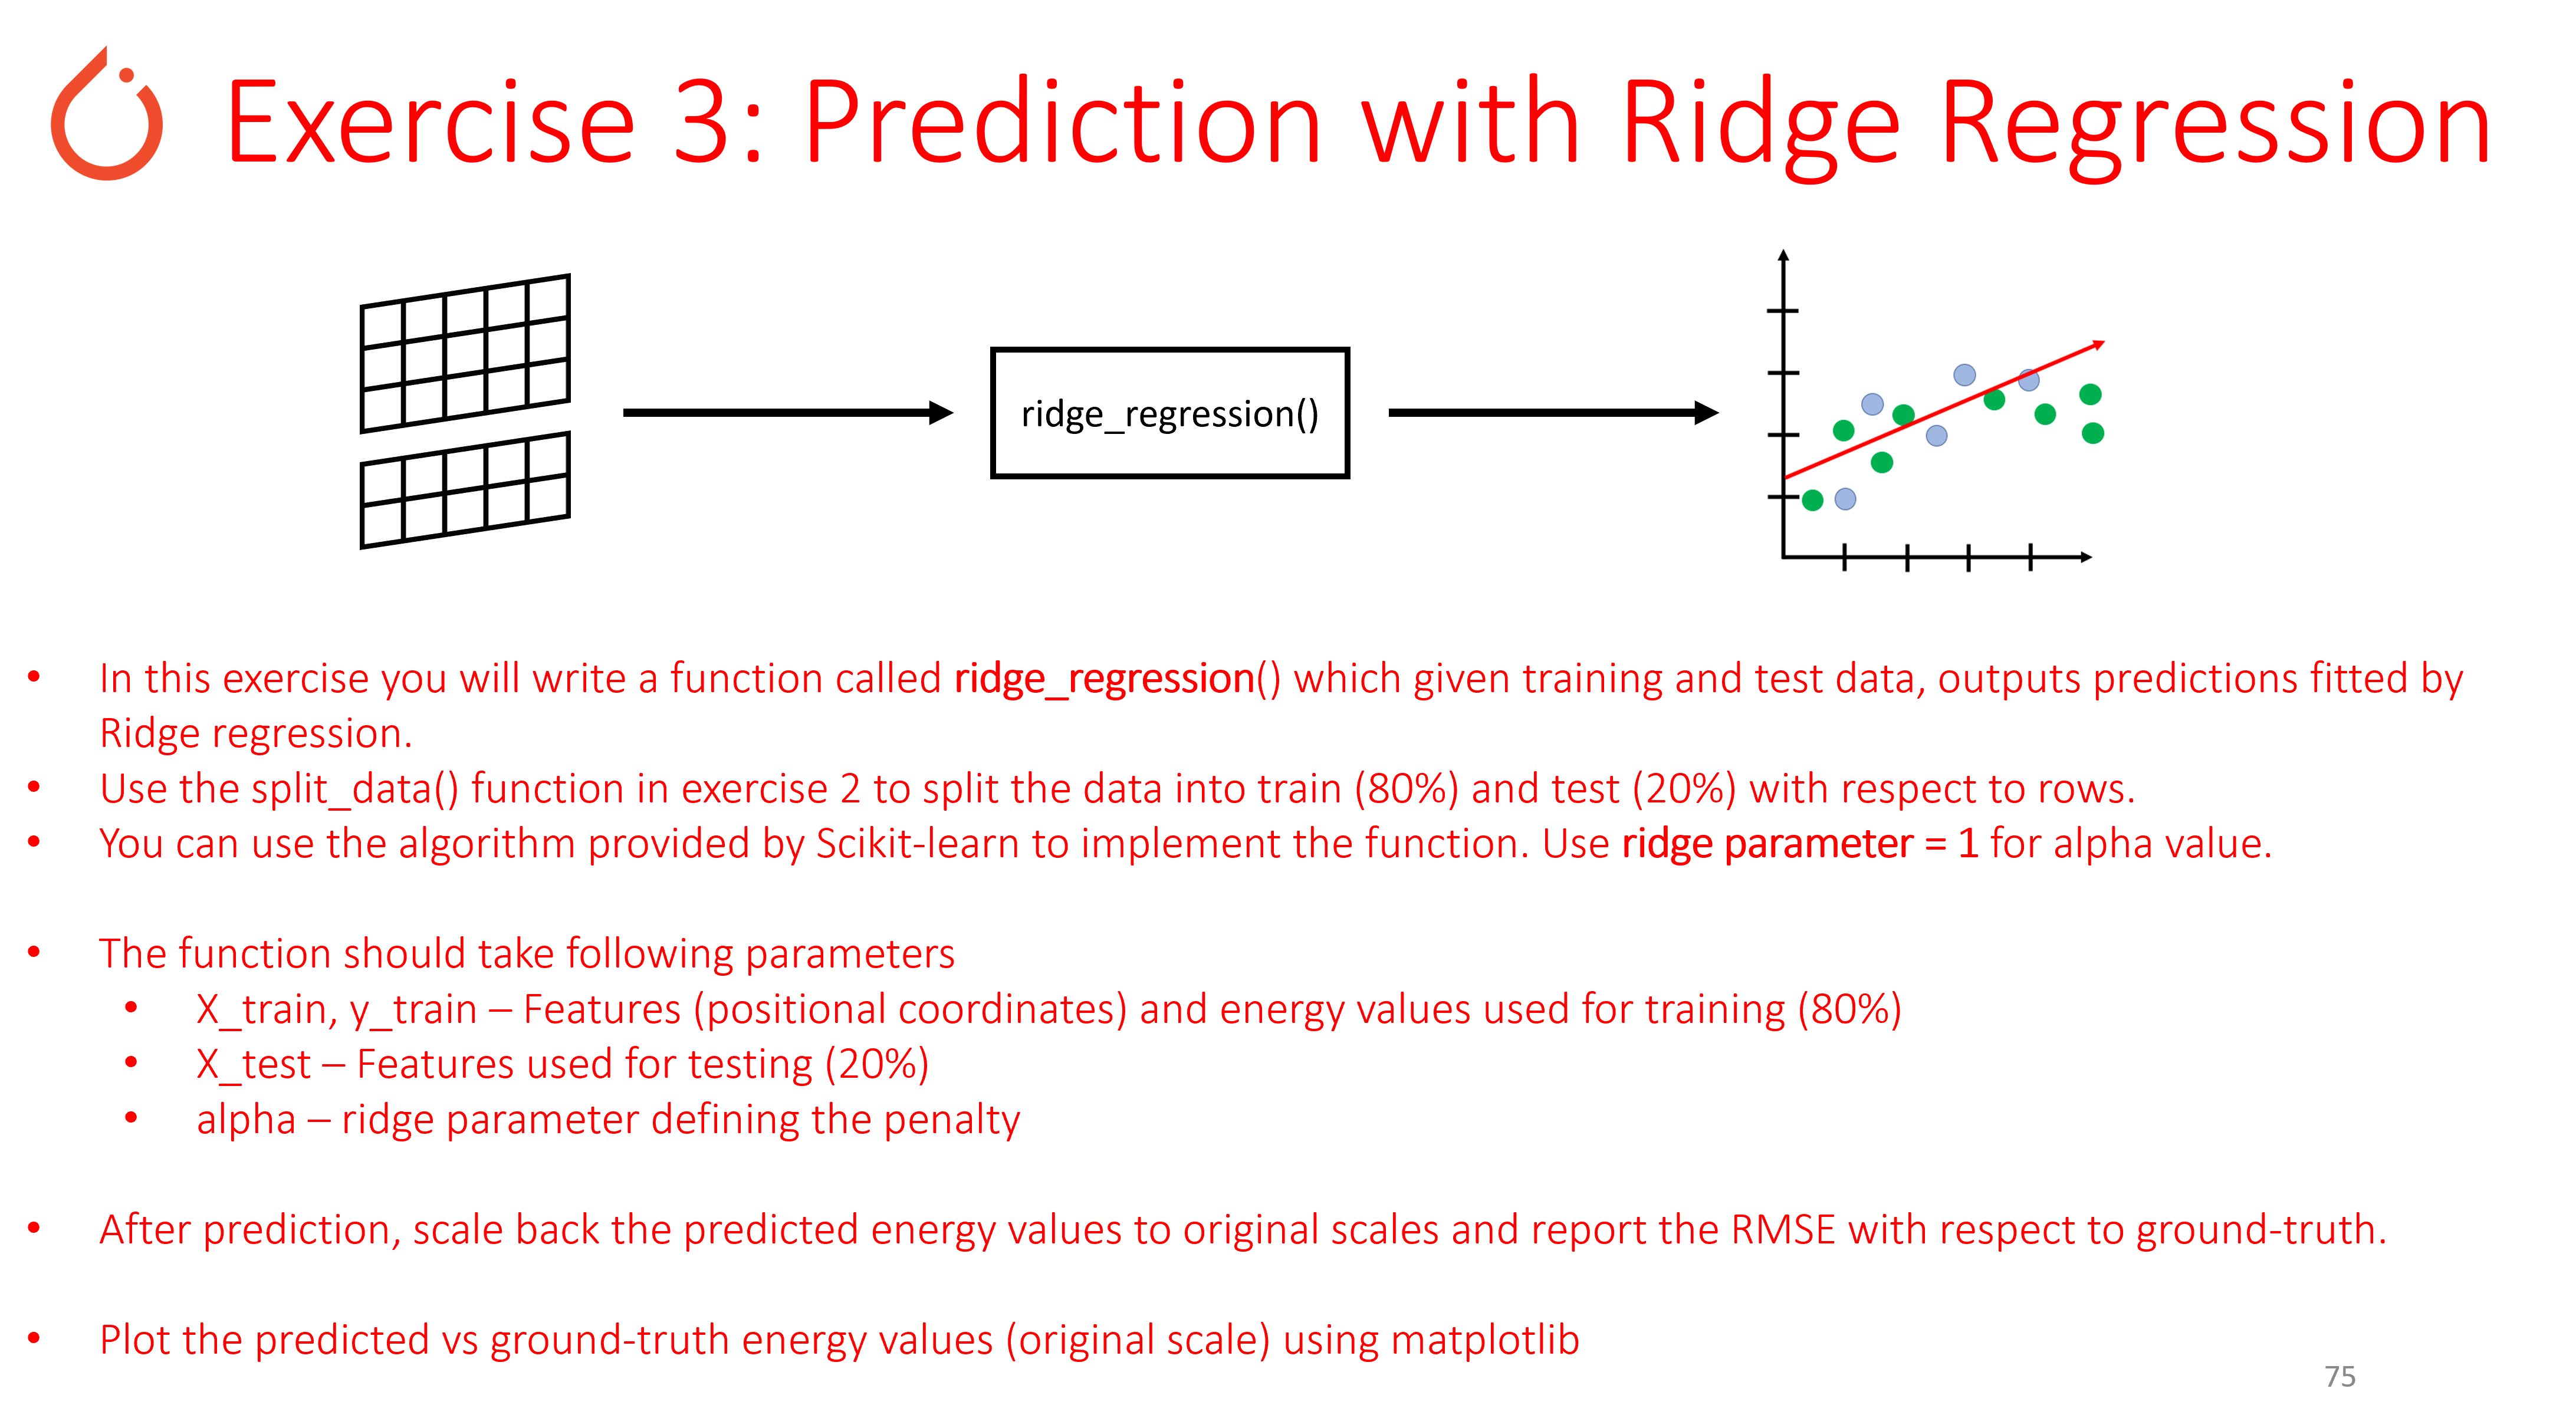

In [18]:
Image('lab1_exercise3.PNG', width = 1000)

In [19]:
# Split data into 80% train and 20% test

# Use our split function to divide data into training and testing sets
CMS_split_data = split_data(arr = CMS_calori_dataset_np_sub_scaled, split_proportions = [0.8, 0.2], axis = 0)


In [20]:
# Implement ridge regression function
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def ridge_regression(X_train, y_train, X_test, alpha):
    # Create and train ridge regression model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    return y_pred

In [21]:
# Produce prediction for test data with alpha = 1

# Extract training and test sets from split data
CMS_train = CMS_split_data[0]
CMS_test = CMS_split_data[1]

# Separate features (x,y,z,eta,phi) and target (energy)
X_train = CMS_train[:, 0:5]  # First 5 columns are features
y_train = CMS_train[:, 5]    # Last column is energy (target)
X_test = CMS_test[:, 0:5]
y_test = CMS_test[:, 5]

# Train model and make predictions
y_pred = ridge_regression(X_train, y_train, X_test, alpha = 1)


In [22]:
# Re-scale the ground-truth and predicted energy values to original scale

# Get original energy statistics for rescaling
original_energy_data = CMS_calori_dataset_np_sub[:, 5]
energy_mean = np.mean(original_energy_data)
energy_std = np.std(original_energy_data)

# Convert scaled values back to original scale
y_test_rescaled = y_test * energy_std + energy_mean
y_pred_rescaled = y_pred * energy_std + energy_mean


In [23]:
# Print RMSE error between ground-truth and predictions

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(rmse)

1.6982972080199157


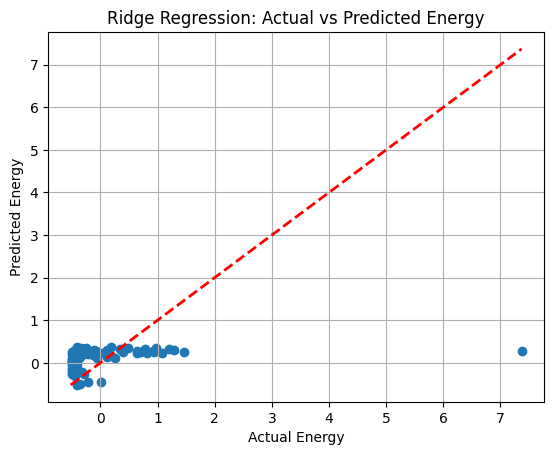

In [25]:
# Plot ground-truth and predicted energy values overlaid on top on each other in a single plot

# scatter plot as used in examples
plt.scatter(y_test, y_pred)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', lw=2)  # Perfect prediction line
plt.title("Ridge Regression: Actual vs Predicted Energy")
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.grid(True)


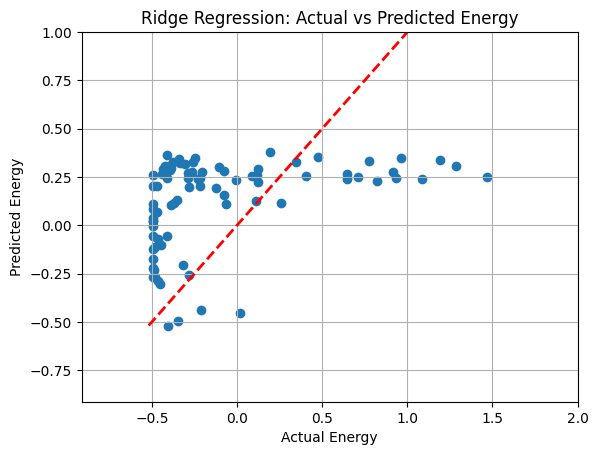

In [ ]:
# This is a bad fit. Here is a zoomed in version. 

plt.scatter(y_test, y_pred)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', lw=2)  # Perfect prediction line
plt.title("Ridge Regression: Actual vs Predicted Energy")
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')
plt.ylim(top=1)
plt.xlim(right=2)
plt.grid(True)